# 이미지 인식 - CNN
## MNIST 사례

## GPU 드라이버 설치 (삼성 노트북 Always9 950XBE)
- NVIDIA MX150 Device Driver Update
- CUDA 10.1 설치
- CUDNN 7.6.3 for CUDA 10.1 다운로드

## Tensorflow-gpu 설치
- conda update conda
- conda update anaconda
- conda update python
- conda update --all
- conda info --envs
- conda create --name tf1.14-gpu
- conda activate tf1.14-gpu
- pip install tensorflow-gpu

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [5]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=1, 
                    callbacks=[early_stopping_callback,checkpointer])

W0830 14:36:48.406148 15604 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 00001: val_loss improved from inf to 0.05820, saving model to ./model/01-0.0582.hdf5

Epoch 00002: val_loss improved from 0.05820 to 0.04163, saving model to ./model/02-0.0416.hdf5

Epoch 00003: val_loss improved from 0.04163 to 0.03729, saving model to ./model/03-0.0373.hdf5

Epoch 00004: val_loss improved from 0.03729 to 0.03051, saving model to ./model/04-0.0305.hdf5

Epoch 00005: val_loss did not improve from 0.03051

Epoch 00006: val_loss improved from 0.03051 to 0.02736, saving model to ./model/06-0.0274.hdf5

Epoch 00007: val_loss improved from 0.02736 to 0.02660, saving model to ./model/07-0.0266.hdf5

Epoch 00008: val_loss did not improve from 0.02660

Epoch 00009: val_loss did not improve from 0.02660

Epoch 00010: val_loss did not improve from 0.02660

Epoch 00011: val_loss did not improve from 0.02660

Epoch 00012: val_loss did not improve from 0.02660

Epoch 00013: val_loss did not improve from 0.02660

Epoch 00014: val_loss did not improve from 0.02660

Epoch 00015

In [11]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 113us/step

 Test Accuracy: 0.9921


In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

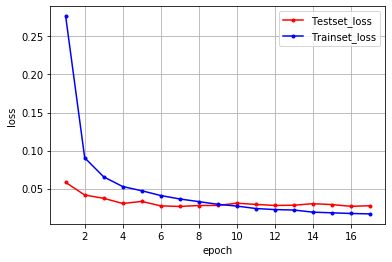

In [13]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 결론: Best Model은 Epoch 13, 정확도는 99.21%